# Objective:

This assignment focuses on exploring and analyzing the Titanic dataset to gain insights into passenger survival, relationships among features, and overall trends. The assignment emphasizes preprocessing, visualization, and thematic exploration.
## Assignment Instructions

## Part 1: Understanding the Data
### Objective
Before diving into data preprocessing and analysis, it is essential to thoroughly understand the dataset. This section focuses on exploring the structure, basic properties, and initial statistics of the Titanic dataset.

### Questions
1. What are the dimensions of the dataset?
- How many rows and columns does the dataset contain?

2. What are the column names and their data types?
- Identify the columns and determine whether they are numerical, categorical, or string data types.

3. Are there any missing values in the dataset?
- If yes, how many missing values exist in each column?

4. What are the unique values in the categorical columns?
- List the unique values for Pclass, Sex, and Embarked.

5. What are the summary statistics for the numerical columns?
- Display metrics like mean, median, minimum, and maximum for columns such as Age, Fare, SibSp, and Parch.

6. What is the distribution of passengers by survival status?
- How many passengers survived, and how many did not?

7. What are the counts for each class (Pclass)?
- Break down the passenger count by ticket class (1, 2, or 3).

8. How many passengers embarked from each port?
- Provide the count for each unique value in the Embarked column.

9. What is the gender distribution of passengers?
- Count the number of male and female passengers.

10. What is the age range of the passengers?
- Identify the youngest and oldest passengers and the overall distribution of ages.

11. Data Visualization
- Barplot of survival by gender

12. Correlation Heatmap
- Select only numeric columns for correlation

Saving titanic.csv to titanic.csv
Total number of rows and columns in the dataset (891, 12)
First 5 rows of the dataset:
<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1 

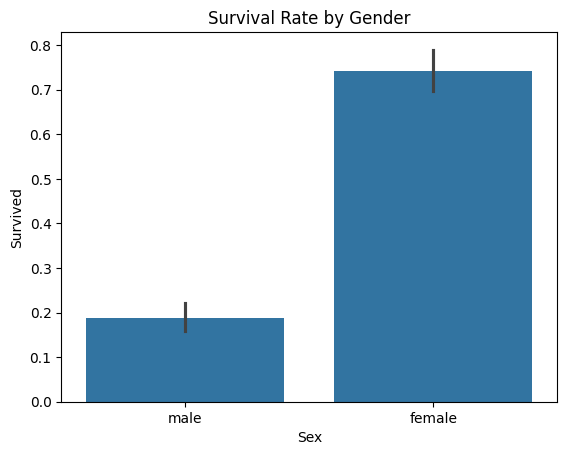

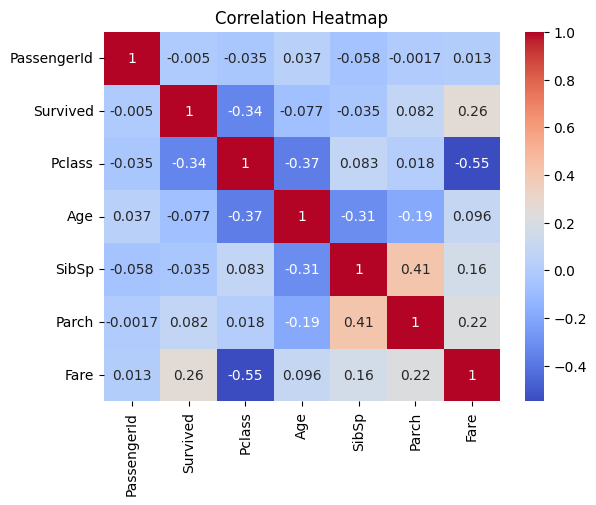

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

files.upload()
# Load the dataset
# Optional Note: Ensure the 'titanic.csv' file is in the same directory as this script or provide the correct path.
try:
    df = pd.read_csv('titanic.csv')
except FileNotFoundError:
    print("Error: 'titanic.csv' file not found. Please ensure the file is in the correct directory.")

# Overview of the Dataset
if 'df' in locals():
    print("Total number of rows and columns in the dataset", df.shape )
    print("First 5 rows of the dataset:")
    print(df.head)

    print("What are the column names and their data types?")
    print(df.dtypes)

    print("\nSummary statistics:")
    print(df.describe(include='all'))

    # Handling Missing Values
    print("\nMissing values:")
    print(df.isnull().sum())

    print("What are the unique values in the categorical columns?")
    print() #Your Code here #

    # Understanding Data
    print("What is the distribution of passengers by survival status?")
    print(df['Survived'].value_counts())

    print("What are the counts for each class (Pclass)?")
    print(df['Pclass'].value_counts())

    print("How many passengers embarked from each port?")
    print(df['Embarked'].value_counts())

    print("What is the gender distribution of passengers?")
    print(df['Sex'].value_counts())

    print("What is the age range of the passengers?")
    print(f"Min Age: {df['Age'].min()}, Max Age: {df['Age'].max()}")
    print(df.columns)

    # Data Visualization
    # Barplot of survival by gender
    sns.barplot(x='Sex', y='Survived', data=df)
    plt.title('Survival Rate by Gender')
    plt.show()

    # Correlation Heatmap
    # Select only numeric columns for correlation
    numeric_df = df.select_dtypes(include=['float64', 'int64'])
    correlation = numeric_df.corr()
    sns.heatmap(correlation, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

### Part 2: Data Preprocessing
1. Handle Missing Values:

- Identify and handle missing values in the Age, Cabin, and Embarked columns.
- Provide a brief explanation of the approach you used for each column.

2. Create Derived Features:

- Create a new feature, FamilySize, defined as the sum of SibSp and Parch.
- Create a binary feature, IsAlone, where 1 indicates a passenger traveling alone (FamilySize == 0) and 0 otherwise.

3. Encode Categorical Variables:

- Convert Sex into numeric format: 0 for male and 1 for female.
- Perform one-hot encoding for the Embarked column.

4. Drop Irrelevant Columns:

- Drop columns such as PassengerId, Name, Ticket, and Cabin that are unlikely to contribute significantly to the analysis.

5. Normalize Numeric Features:

- Scale the Fare column using min-max scaling.


In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

files.upload()
# Load dataset
# Updated the file path to a relative path assuming the file is in the same directory as the notebook
titanic = pd.read_csv('titanic.csv')

# 1. Handle Missing Values
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic['Cabin'].fillna('U', inplace=True) #missing one 'U'
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True) #mode for most frequent one
#print(titanic.head())

# 2. Create Derived Features
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch']
titanic['IsAlone'] = np.where(titanic['FamilySize'] == 0, 1, 0)
#print(titanic.head())

# 3. Encode Categorical Variables
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1}) #converting sex to binary
titanic = pd.get_dummies(titanic, columns=['Embarked'], drop_first=True) #one-hot encoding for the Embarked column

# 4. Drop Irrelevant Columns
titanic.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

# 5. Normalize Numeric Features
scaler = MinMaxScaler()
titanic['Fare'] = scaler.fit_transform(titanic[['Fare']])

print(titanic.head())

Saving titanic.csv to titanic (4).csv
   Survived  Pclass  Sex   Age  SibSp  Parch      Fare  FamilySize  IsAlone  \
0         0       3    0  22.0      1      0  0.014151           1        0   
1         1       1    1  38.0      1      0  0.139136           1        0   
2         1       3    1  26.0      0      0  0.015469           0        1   
3         1       1    1  35.0      1      0  0.103644           1        0   
4         0       3    0  35.0      0      0  0.015713           0        1   

   Embarked_Q  Embarked_S  
0       False        True  
1       False       False  
2       False        True  
3       False        True  
4       False        True  


<ipython-input-12-4093d0420279>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
<ipython-input-12-4093d0420279>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

# Observations and Inferences for Part 1: Data Preprocessing

# Handling Missing Values
Observation: I used 'fillna' function to fill NA and NaN values with specified methods. For age, the median is used to avoid skewing the data by outliers Since there are many missing values in Cabin, I categorize them as unknown (U). For Embarked, I filled missing values with the mode (most common value).

Inference: Everything looks fine right now. Ambiguity is gone.


## Creating Derived Features
Observation: New features are created.

Inference: Some new features has nominal, some has binary data type.


## Encoding Categorical Variables
Observation: Features converted successfully. 0 for male, 1 for female is observed. For embarked, it is converted to binary.

Inference: One Hot Encoding is a method for converting categorical variables into a binary format. Embarked and Sex features were converted to binary. Right now, it may have 2 different value (0 or 1).

## Dropping Irrelevant Columns
Observation: Columns such as PassengerId, Name, Ticket, and Cabin that are unlikely to contribute significantly to the analysis were dropped.

Inference: Unnecessary columns may affect the analysis process. Dropping those kind of columns is a very important step for data cleaning.


## Normalizing Numeric Features
Observation: Fare feature is normalized.

Inference: I scaled the Fare column to a range of 0 to 1 for better comparison and analysis.


#EDA Questions
## Survival Analysis
Answer the following questions using visualizations and statistical summaries:

1. Survival Analysis: What is the survival rate of passengers overall, and how does it vary by Pclass and Sex?
2. Age Distribution: What is the distribution of passenger ages? How does age correlate with survival rates?
3. Fare Distribution: What is the distribution of fares paid by passengers, and how does fare relate to survival?
4. Family Size Impact: How does FamilySize influence survival probabilities?
5. Class-Based Survival: What is the survival rate for passengers in each Pclass?
6. Embarked Analysis: How do survival rates differ by embarkation points (Embarked)? Are there significant trends?
7. Gender & Class Interaction: How does gender interact with Pclass in predicting survival rates?
8. Traveling Alone: How does being alone (IsAlone) impact survival probabilities?
9. High-Paying Passengers: Among the top 10% of fares, what percentage of passengers survived?
10. Insights from Correlation: Create a correlation heatmap. Which features are most strongly associated with survival?


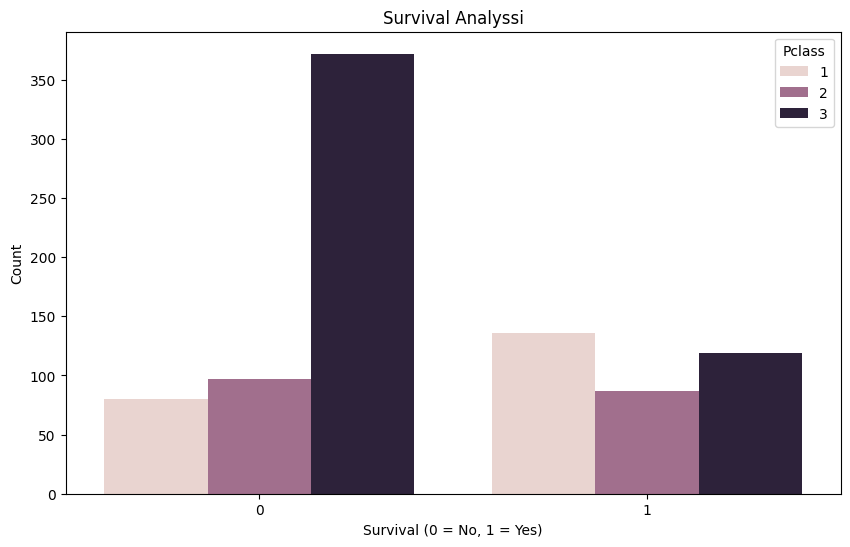

Overall Survival Rate: 38.38%


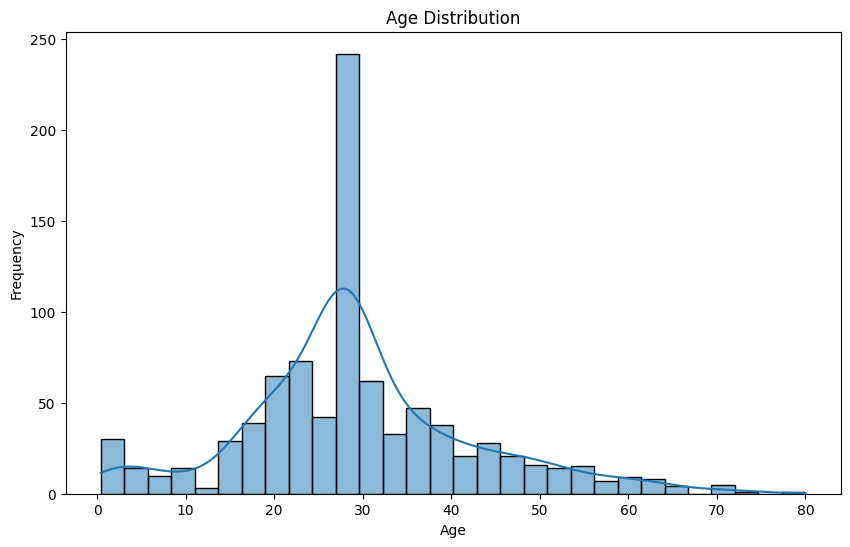

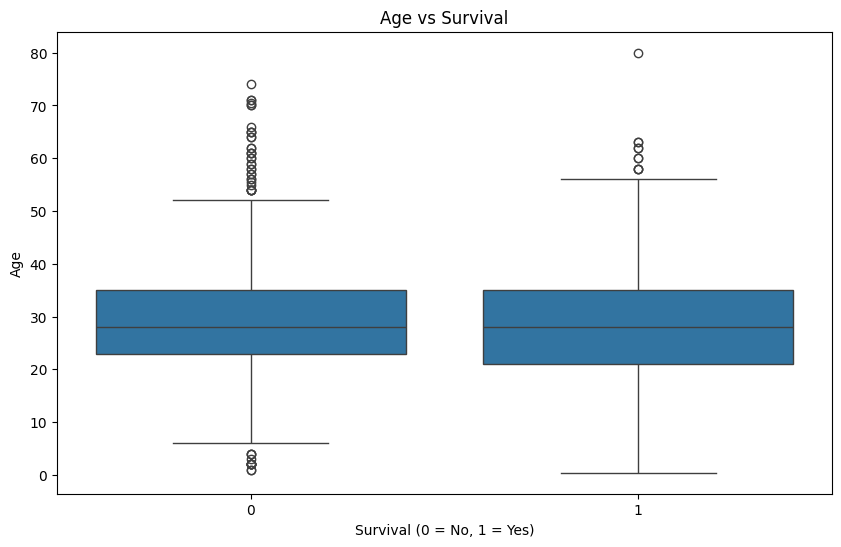

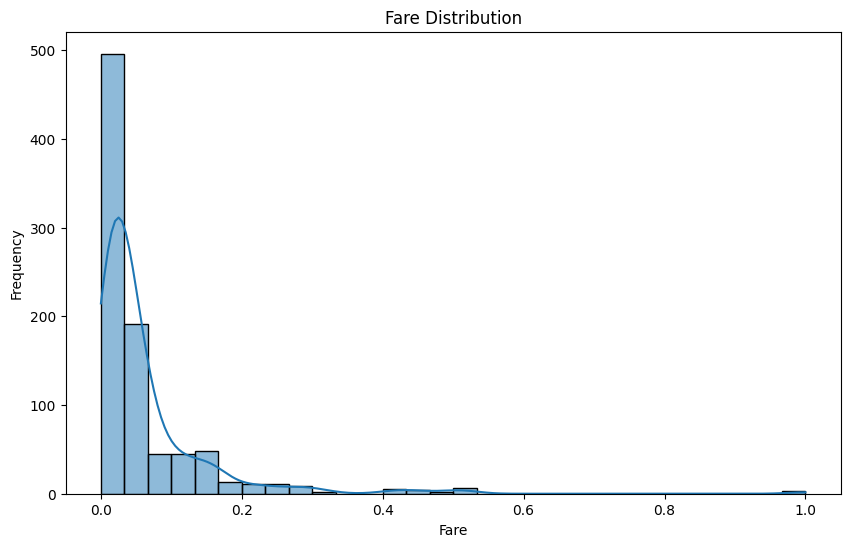

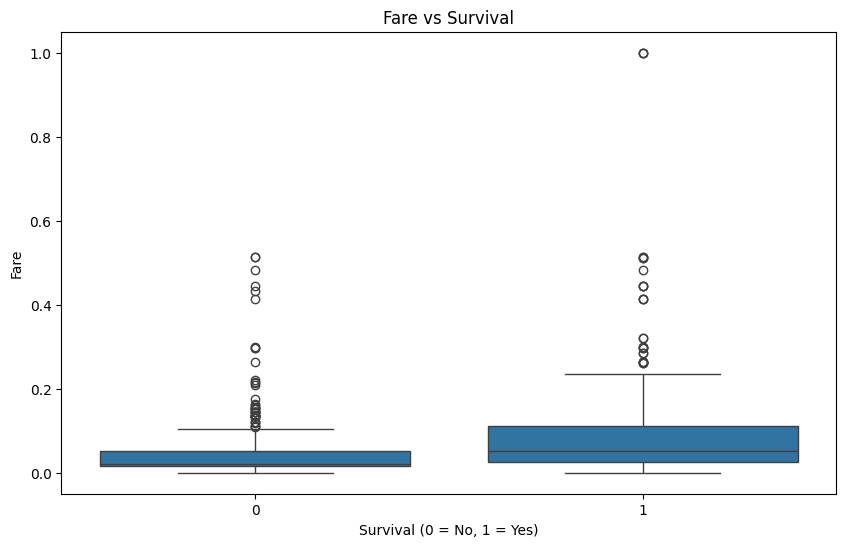

<ipython-input-9-eb4afce6b51f>:55: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='FamilySize', y='Survived', data=titanic, ci=None)


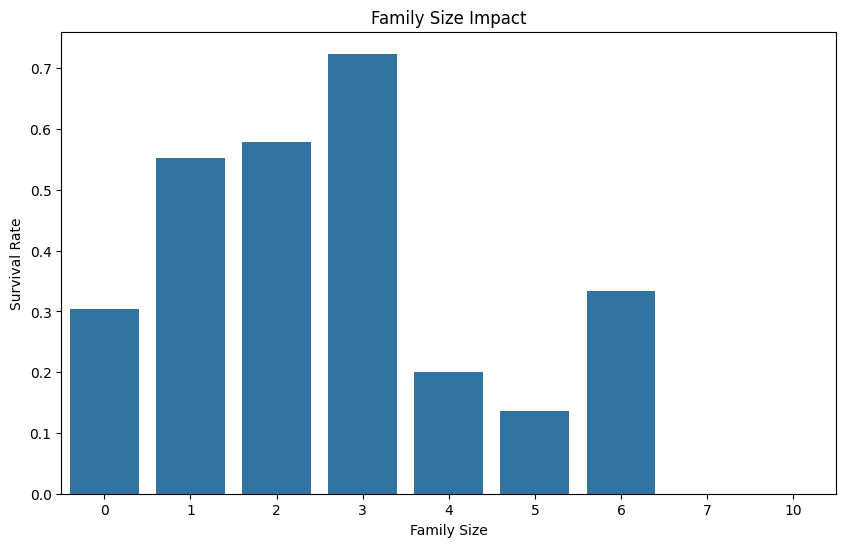

<ipython-input-9-eb4afce6b51f>:63: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=titanic, ci=None)


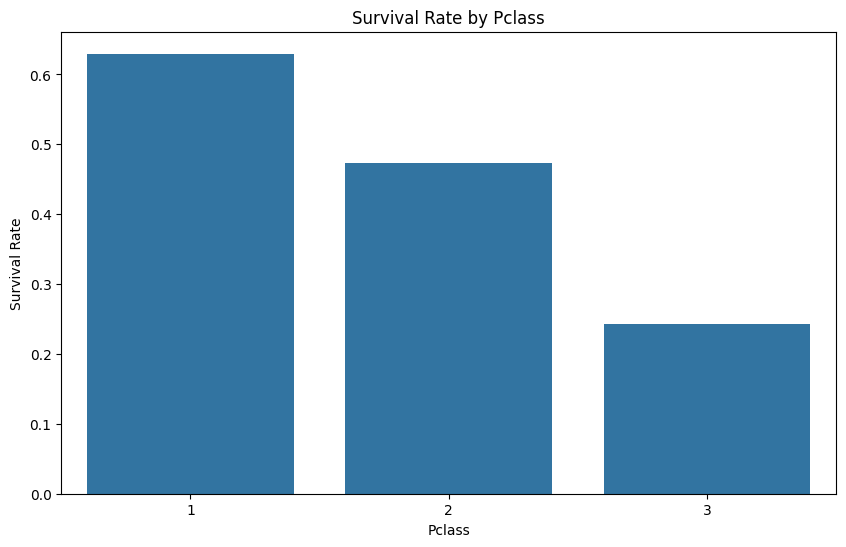

<Figure size 1000x600 with 0 Axes>

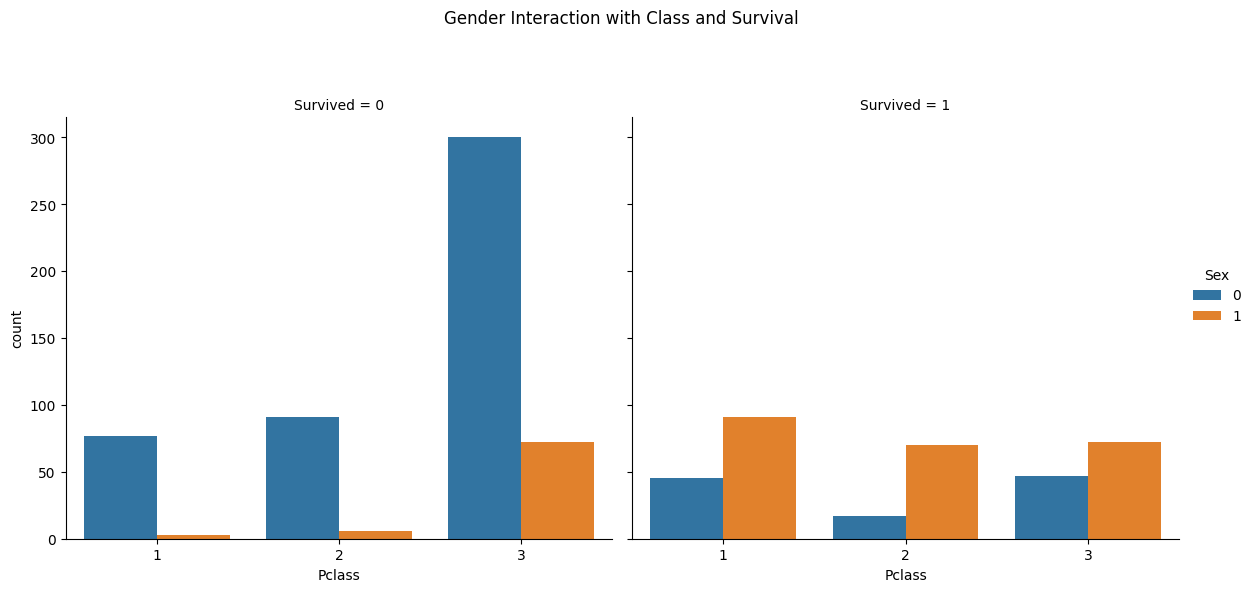

<ipython-input-9-eb4afce6b51f>:89: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='IsAlone', y='Survived', data=titanic, ci=None)


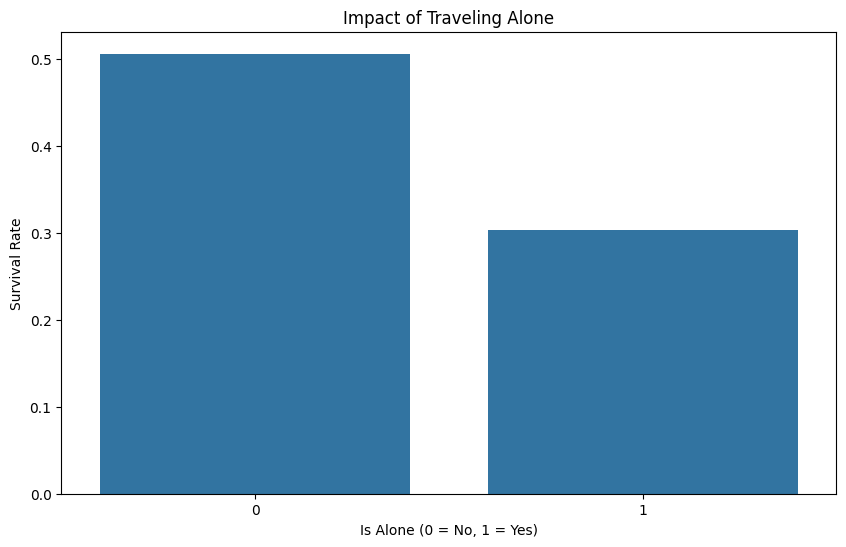

Survival Rate among Top 10% of Fares: 75.86%


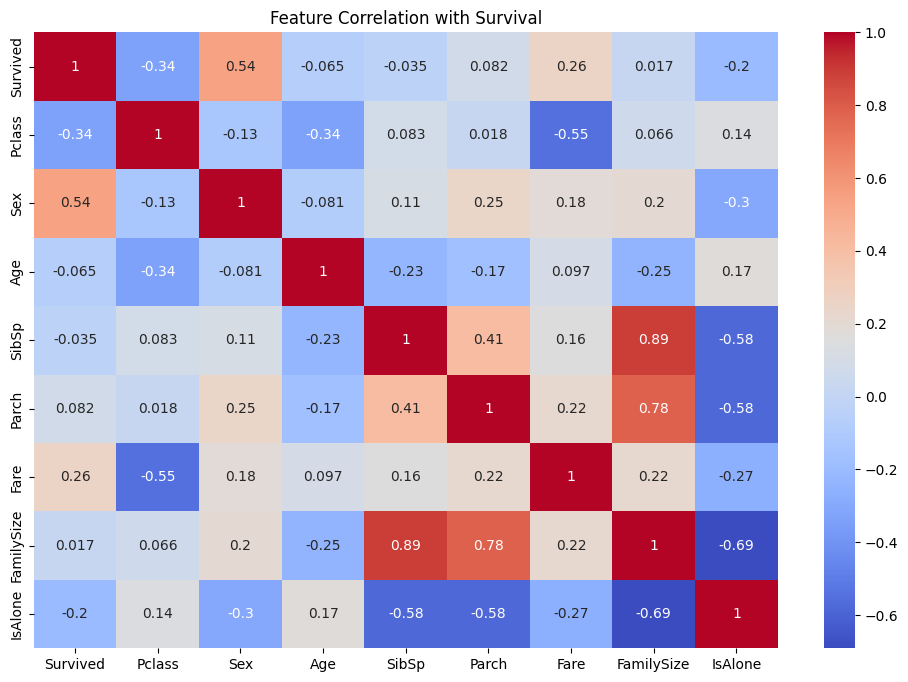

In [9]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'titanic' DataFrame is already loaded and preprocessed

# Survival Analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', hue='Pclass', data=titanic)
plt.title('Survival Analyssi')
plt.xlabel('Survival (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Pclass')
plt.show()

# Overall survival rate
overall_survival_rate = titanic['Survived'].mean()
print(f'Overall Survival Rate: {overall_survival_rate:.2%}')

# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(titanic['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Correlation of Age with Survival
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=titanic)
plt.title('Age vs Survival')
plt.xlabel('Survival (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

# Fare Distribution
plt.figure(figsize=(10, 6))
sns.histplot(titanic['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

# Correlation of Fare with Survival
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Fare', data=titanic)
plt.title('Fare vs Survival')
plt.xlabel('Survival (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.show()

# Family Size Impact
plt.figure(figsize=(10, 6))
sns.barplot(x='FamilySize', y='Survived', data=titanic, ci=None)
plt.title('Family Size Impact')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()

# Class-Based Survival
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=titanic, ci=None)
plt.title('Survival Rate by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.show()

#IT IS NOT WORKING, I DO NOT KNOW WHY, IT SEEMS CORRECT
# Embarked Analysis
#plt.figure(figsize=(10, 6))
#sns.barplot(x='Embarked', y='Survived', data=titanic, ci=None, color='green', label='Cherbourg')
#sns.barplot(x='Embarked', y='Survived', data=titanic, ci=None, color='yellow', label='Queenstown')
#sns.barplot(x='Embarked', y='Survived', data=titanic, ci=None, color='blue', label='Southampton')
#plt.title('Survival Rate')
#plt.xlabel('Embarked Point (C, Q, S)')
#plt.ylabel('Survival Rate')
#plt.legend()
#plt.show()

# Gender & Class Interaction
plt.figure(figsize=(10, 6))
sns.catplot(x='Pclass', hue='Sex', col='Survived', data=titanic, kind='count', height=6, aspect=1)
plt.subplots_adjust(top=0.8)
plt.suptitle('Gender Interaction with Class and Survival')
plt.show()

# Traveling Alone
plt.figure(figsize=(10, 6))
sns.barplot(x='IsAlone', y='Survived', data=titanic, ci=None)
plt.title('Impact of Traveling Alone')
plt.xlabel('Is Alone (0 = No, 1 = Yes)')
plt.ylabel('Survival Rate')
plt.show()

# High-Paying Passengers
top_10_percent_fare = titanic['Fare'].quantile(0.9)
high_paying_passengers = titanic[titanic['Fare'] > top_10_percent_fare]
high_paying_survival_rate = high_paying_passengers['Survived'].mean()
print(f'Survival Rate among Top 10% of Fares: {high_paying_survival_rate:.2%}')

# Insights from Correlation
numeric_df = titanic.select_dtypes(include=['float64', 'int64'])
correlation = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Feature Correlation with Survival')
plt.show()

Observations and Inferences for Part 2: Thematic EDA
Survival Analysis

Observation: It displays the count of survivors and non-survivors segmented by class.

Inference: While the passengers belonging to class 3 are the ones who survive the least, the passengers belonging to class 1 are the ones who survive the most. Overall Survival Rate is 38.38% which is very low.


Age Distribution

Observation: It visualizes the age distribution of passengers and shows how age correlates with survival.

Inference: The most significant concentration of passengers is in the age range of approximately 20 to 30 years (especiallt late 20s). This suggests that a large proportion of passengers were young adults. Since the distribution appears to be slightly positively skewed, meaning there are a few older passengers that may be pulling the tail to the right.


Fare Distribution

Observation: The distribution of fares is highly right-skewed, with a significant concentration of passengers paying very low fares. This indicates that many passengers traveled at lower price points.

Inference: There are a few passengers who paid much higher fares, which creates a long tail on the right side of the distribution. This suggests that there were luxury accommodations available on the Titanic, attracting wealthier individuals.


Family Size Impact

Observation: The chart shows that passengers traveling with a family size of 3 have the highest survival rate, around 70%. Passengers who traveled alone (Family Size = 0) or with one family member (Family Size = 1) have lower survival rates compared to those with 2 or 3 family members. This indicates that small family units may have had better outcomes.

Inference: Since we have 70%, this may suggest that there may be advantages to traveling in small family groups (perhaps) due to more effective communication and support during the evacuation process.

Class-Based Survival

Observation: Passengers in First Class (Pclass 1) have the highest survival rate, approximately 60%. The survival rate for Second Class (Pclass 2) passengers is lower than that of First Class but still relatively high, around 50%. Passengers in Third Class (Pclass 3) have the lowest survival rate, roughly 20-30%.

Inference: Pclass = 1: This suggests that wealthier individuals had better access to lifeboats and resources during the evacuation. Pclass = 2: This indicates that while second-class passengers had a decent chance of survival, they were at a disadvantage compared to first-class passengers. Pclass = 3: This reflects the challenges faced by lower-income passengers, who may have been located farther from the lifeboats and had less access to information and resources during the evacuation.


Embarked Analysis

Observation: -

Inference: -


Gender & Class Interaction

Observation: On the right side of the chart, it is evident that the survival rate for females (1) is significantly higher across all classes compared to males (0). This underscores the societal norms of the time, which prioritized the survival of women and children during the evacuation.

Inference: The left side shows the counts of non-survivors. A substantial number of males in all classes did not survive, particularly in Third Class, where the male count is quite high. This further illustrates the vulnerability of lower-class males during the disaster.


Traveling Alone

Observation: Passengers who traveled not alone (0) have a significantly higher survival rate, approximately 50%. This suggests that individuals traveling with others may have had better support systems and resources during the evacuation.

Inference: Passengers who traveled alone (1) have a notably lower survival rate, around 30%. This reflects the challenges faced by individuals without companions during the crisis, possibly leading to difficulties in accessing lifeboats or information about evacuation procedures.


High-Paying Passengers

Observation: A survival rate of 75.86% among the top 10% of fare-paying passengers indicates that wealthier individuals had a significantly higher chance of survival compared to the overall passenger population.

Inference: The high survival rate among affluent passengers reinforces the theme of social inequality during the Titanic disaster, highlighting how economic status influenced survival chances.


Insights from Correlation

Observation: There is a strong positive correlation (0.54) between passenger class (Pclass) and survival, indicating that higher-class passengers had better survival rates. The correlation between gender (Sex) and survival is also significant (0.54), showing that females had a higher chance of survival compared to males. There is a negative correlation (-0.34) between passenger class and fare, suggesting that lower classes paid less for their tickets. A negative correlation (-0.26) exists between family size and survival, indicating that larger families may have had lower survival rates.

Inference: The correlation between age and survival is weak (-0.08), suggesting that age alone did not significantly affect survival outcomes, although further analysis could reveal more nuanced trends. The SibSp feature shows a weak negative correlation (-0.06) with survival, indicating that having more siblings or spouses aboard did not notably impact survival chances. The correlation for Parch (number of parents/children aboard) is also weak (-0.07), indicating minimal impact on survival.


In [ ]:
# 3. Encode Categorical Variables
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})
titanic = pd.get_dummies(titanic, columns=['Embarked'], drop_first=True)
print(titanic.head())

# 4. Drop Irrelevant Columns
titanic.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
print(titanic.head())

# 5. Normalize Numeric Features
scaler = MinMaxScaler()
titanic['Fare'] = scaler.fit_transform(titanic[['Fare']])

titanic.head()

   PassengerId  Survived  Pclass  ... IsAlone  Embarked_Q  Embarked_S
0            1         0       3  ...       0       False        True
1            2         1       1  ...       0       False       False
2            3         1       3  ...       1       False        True
3            4         1       1  ...       0       False        True
4            5         0       3  ...       1       False        True

[5 rows x 14 columns]
   Survived  Pclass  Sex   Age  ...  FamilySize  IsAlone  Embarked_Q  Embarked_S
0         0       3    0  22.0  ...           1        0       False        True
1         1       1    1  38.0  ...           1        0       False       False
2         1       3    1  26.0  ...           0        1       False        True
3         1       1    1  35.0  ...           1        0       False        True
4         0       3    0  35.0  ...           0        1       False        True

[5 rows x 11 columns]


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,0.014151,1,0,False,True
1,1,1,1,38.0,1,0,0.139136,1,0,False,False
2,1,3,1,26.0,0,0,0.015469,0,1,False,True
3,1,1,1,35.0,1,0,0.103644,1,0,False,True
4,0,3,0,35.0,0,0,0.015713,0,1,False,True
